<a href="https://colab.research.google.com/github/YumnaZai/ML-Projects/blob/main/ANN-Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**📱Artifial Neural Network Model - Mobile Phone Price Range**




#What Model : Artificial Neural Network Model

### 1. What is solved : Binary classification

### Binary class label indicating high or low price of mobile phones

#### This dataset contains 2,000 mobile phone records with 21 features, used to predict the price range of mobile phones based on their technical specifications. Sales data for  mobile phones of various companies





### 2. Collect relevent data - Import data

In [ ]:
import pandas as pd
df = pd.read_csv('/content/Mobile_Price_Classification-220531-204702.csv')
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,0
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,0
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,0
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,1
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


## 3.Encode categorical data-> converting non-numeric data (like categories or labels) into a numeric format so that machine learning models can understand
**No need as the clases are already in 0 and 1**
**No need of one-hot encoding or label encoding**

## Extract the independent and dependent variables

In [ ]:
# 1. Identify the x and y
x = df.drop('price_range', axis=1)
y = df['price_range']

##4.Normalize/scale numerical data:
**To make sure that all the features have equal contribution to the output**
Often using Min-Max or StandardScaler.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_norm = scaler.fit_transform(x)

##5. Split the data set into train, validationand test

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_norm,y,test_size=0.25)

#Import Dependencies

In [ ]:
from keras.models import Sequential,load_model
from keras.layers import Dense,Dropout

# 4. Choose the Right Architecture

## - Input layers : Number of neurons = 8(input features)

## - Hidden layer 1 : Number of neurons per layer = 4

## - Output layers : Number of neurons = 1

In [ ]:
model = Sequential() #to stack the layers one under the other

# The input layer
model.add(Dense(units=8, activation='relu',input_dim=x_train.shape[1]))
# 8 neurons, relu function, number of input features = input columns

# Second hidden layer
model.add(Dense(units=4,activation='relu'))
# 4 neurons

# output layer
model.add(Dense(units=1,activation='sigmoid'))
# 1 neuron, sigmoid - (only 0 and 1 as output)

model.summary()
# how many layers, how many parameters, shape of input and output at each step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 8)              │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 209 (836.00 B)

 Trainable params: 209 (836.00 B)

 Non-trainable params: 0 (0.00 B)

#5. Complie the model

## Loss function : Binary classification: binary_crossentroy

## Optimizer: adam
## Evaluation metrics: Accuracy


In [ ]:
# Binary Calssifcation
model.compile(loss= 'binary_crossentropy',
              optimizer='adam',
              metrics =['accuracy'])


#6. Train the Model
- Feed the training data in batches over epochs

- Monitor performance on validation data

**Optional**
- Use callbacks:

  EarlyStopping: Stop training if no improvement


In [ ]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=32)

Epoch 1/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4642 - loss: 0.7372 - val_accuracy: 0.5020 - val_loss: 0.6940
Epoch 2/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5126 - loss: 0.6930 - val_accuracy: 0.5180 - val_loss: 0.6870
Epoch 3/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5406 - loss: 0.6888 - val_accuracy: 0.5620 - val_loss: 0.6811
Epoch 4/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5703 - loss: 0.6806 - val_accuracy: 0.5840 - val_loss: 0.6757
Epoch 5/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5797 - loss: 0.6776 - val_accuracy: 0.5740 - val_loss: 0.6712
Epoch 6/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5937 - loss: 0.6693 - val_accuracy: 0.5740 - val_loss: 0.6669
Epoch 7/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6012 - loss: 0.6679 - val_accuracy: 0.5820 - val_loss: 0.6613
Epoch 8/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6436 - loss: 0.6531 - val_accuracy: 0.6000 - v

#Uses the trained model to make predictions on the input data

In [ ]:
#Helps you evaluate how well the model fits the training set
y_nn_train_pred = model.predict(x_train)
#Helps you evaluate how well the model generalizes to new data
y_nn_test_pred = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


# Evaluate the Model
* Use metrics appropriate to the task:
  Classification: Accuracy, F1-score, Confusion matrix

In [ ]:
# As the output are probabailities, Convert them class lables first
y_nn_train_pred_lables = (y_nn_train_pred > 0.5).astype(int)
y_nn_test_pred_labels = (y_nn_test_pred > 0.5).astype(int)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Train
accuracy_train = accuracy_score(y_train, y_nn_train_pred_lables) # Calculates TOTAL CORRECT PREDICTIONS out of all predictions made
precision_train = precision_score(y_train, y_nn_train_pred_lables ) #Calculates PREDICTED POSITIVE CASES that are actually positive
recall_train = recall_score(y_train, y_nn_train_pred_lables) # ACTUAL POSITIVE CASES that are actually positive
f1_train = f1_score(y_train, y_nn_train_pred_lables) # A number that tells you how good your model is at catching the right cases
confusion_train = confusion_matrix(y_train, y_nn_train_pred_lables) # counts of true positives, false positives, true negatives, and false negatives

# Test
accuracy_test = accuracy_score(y_test, y_nn_test_pred_labels)
precision_test = precision_score(y_test, y_nn_test_pred_labels)
recall_test = recall_score(y_test, y_nn_test_pred_labels)
f1_test = f1_score(y_test, y_nn_test_pred_labels)
confusion_test = confusion_matrix(y_test, y_nn_test_pred_labels)

In [ ]:
print("NN Acuuracy (Train):",accuracy_train)
print("NN Precision (Train):",precision_train)
print("NN Recall (Test):",recall_train)
print("NN fl (Test):",f1_train)
print("NN Confusion matrix (Train):", confusion_train)

NN Acuuracy (Train): 0.6466666666666666
NN Precision (Train): 0.6474622770919067
NN Recall (Test): 0.6335570469798658
NN fl (Test): 0.6404341926729986
NN Confusion matrix (Train): [[498 257]
 [273 472]]


In [ ]:
print("NN Acuuracy (Test):",accuracy_test)
print("NN Precision (Test):",precision_test)
print("NN Recall (Test):",recall_test)
print("NN fl (Test):",f1_test)
print("NN Confusion matrix (Test):", confusion_test)

NN Acuuracy (Test): 0.606
NN Precision (Test): 0.6239316239316239
NN Recall (Test): 0.5725490196078431
NN fl (Test): 0.5971370143149284
NN Confusion matrix (Test): [[157  88]
 [109 146]]


#Model Visualization



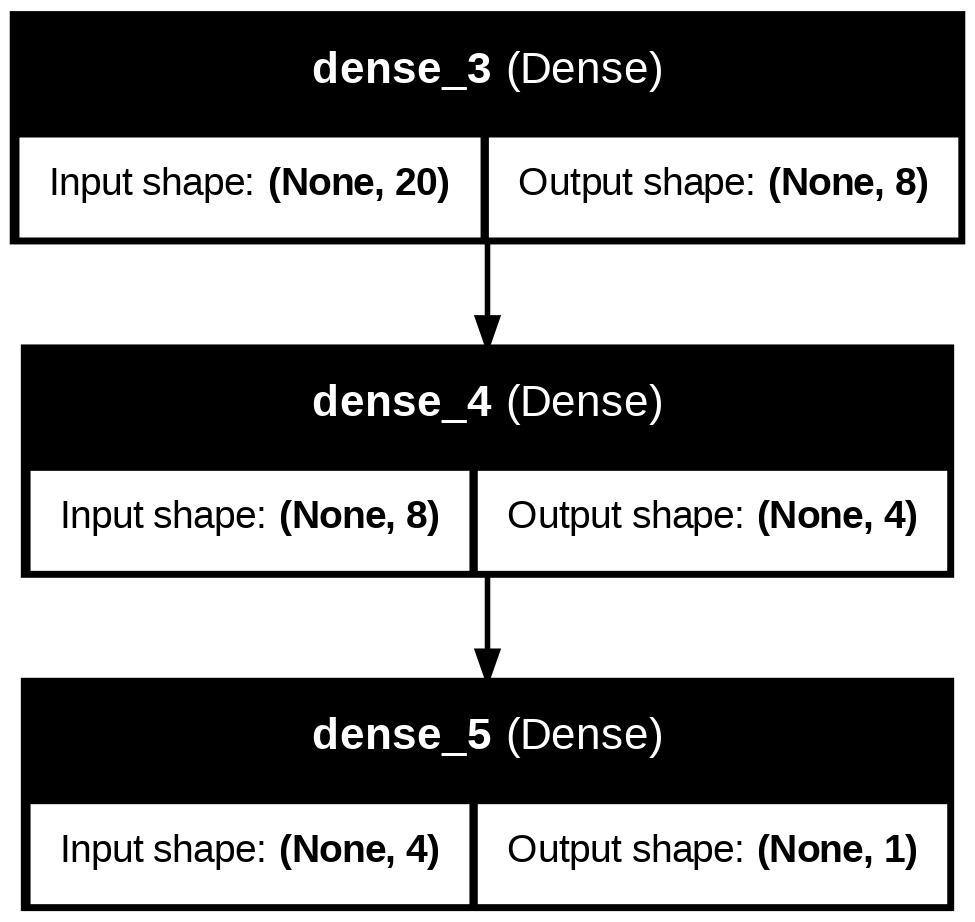

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

### Save the weights

In [ ]:
model.save_weights('phone_price.weights.h5')